**데이터 불러오기: Breast Cancer**

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True, as_frame=True)

In [ ]:
print(X.columns)

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


**데이터 분할**

In [ ]:
from sklearn.model_selection import train_test_split
trn_X, tst_X, trn_y, tst_y = train_test_split(X, y, test_size=0.3,
                                              random_state=1234)
print(trn_X.shape, tst_X.shape)

(398, 30) (171, 30)


**데이터 분할 with k-fold CV**

In [ ]:
from sklearn.model_selection import KFold

num_cv = 5 # k in k-fold cv
k_fold = KFold(n_splits=num_cv, shuffle=True)

k = 1
for idx_trn, idx_val in k_fold.split(trn_X):
  X_trn, X_val = trn_X.iloc[idx_trn, :], trn_X.iloc[idx_val, :]
  y_trn, y_val = trn_y.iloc[idx_trn], trn_y.iloc[idx_val]

  ratio_train = round(X_trn.shape[0] / trn_X.shape[0], 4)
  ratio_valid = round(X_val.shape[0] / trn_X.shape[0], 4)
  print('k={}, training={}%, validation={}%'.format(k,
                                                    ratio_train*100,
                                                    ratio_valid*100))
  k += 1

k=1, training=79.9%, validation=20.1%
k=2, training=79.9%, validation=20.1%
k=3, training=79.9%, validation=20.1%
k=4, training=80.15%, validation=19.85%
k=5, training=80.15%, validation=19.85%


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
num_cv = 5
k_fold = KFold(n_splits=num_cv, shuffle=True)

acc = []
k = 1
for idx_trn, idx_val in k_fold.split(trn_X):
  print('Iteration', k)
  
  X_trn, X_val = trn_X.iloc[idx_trn, :], trn_X.iloc[idx_val, :]
  y_trn, y_val = trn_y.iloc[idx_trn], trn_y.iloc[idx_val]

  clf = RandomForestClassifier(n_estimators=50,
                               max_depth=5,
                               max_features='sqrt').fit(X_trn, y_trn)
  prd = clf.predict(X_val)

  acc.append(
      accuracy_score(y_val, prd)
  )

  k += 1

Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5


In [ ]:
print('정확도의 개수:', len(acc))
print('정확도의 평균:', np.mean(acc))
print('정확도의 편차:', np.std(acc))

정확도의 개수: 5
정확도의 평균: 0.9572784810126581
정확도의 편차: 0.012787708031012772


**k-fold CV + Hyperparameter 선택**

In [ ]:
num_trees = [10, 30, 50]
max_depths = [2, 3, 5]

num_cv = 5
k_fold = KFold(n_splits=num_cv, shuffle=True)

k = 1
acc_avg = []
acc_std = []
params = []

# 하이퍼파라메터 선택
for T in num_trees:
  for M in max_depths:

    params.append(str(T)+'&'+str(M))
    # k-fold CV
    acc = []
    k = 1
    for idx_trn, idx_val in k_fold.split(trn_X):
      print('n_estimators={}, max_depth={}, k={}'.format(T, M, k))
      
      X_trn, X_val = trn_X.iloc[idx_trn, :], trn_X.iloc[idx_val, :]
      y_trn, y_val = trn_y.iloc[idx_trn], trn_y.iloc[idx_val]

      clf = RandomForestClassifier(n_estimators=T,
                                   max_depth=M).fit(X_trn, y_trn)
      prd = clf.predict(X_val)

      acc.append(
          accuracy_score(y_val, prd)
      )
      k += 1
    
    acc_avg.append(np.mean(acc))
    acc_std.append(np.std(acc))
    print('\n')

n_estimators=10, max_depth=2, k=1
n_estimators=10, max_depth=2, k=2
n_estimators=10, max_depth=2, k=3
n_estimators=10, max_depth=2, k=4
n_estimators=10, max_depth=2, k=5


n_estimators=10, max_depth=3, k=1
n_estimators=10, max_depth=3, k=2
n_estimators=10, max_depth=3, k=3
n_estimators=10, max_depth=3, k=4
n_estimators=10, max_depth=3, k=5


n_estimators=10, max_depth=5, k=1
n_estimators=10, max_depth=5, k=2
n_estimators=10, max_depth=5, k=3
n_estimators=10, max_depth=5, k=4
n_estimators=10, max_depth=5, k=5


n_estimators=30, max_depth=2, k=1
n_estimators=30, max_depth=2, k=2
n_estimators=30, max_depth=2, k=3
n_estimators=30, max_depth=2, k=4
n_estimators=30, max_depth=2, k=5


n_estimators=30, max_depth=3, k=1
n_estimators=30, max_depth=3, k=2
n_estimators=30, max_depth=3, k=3
n_estimators=30, max_depth=3, k=4
n_estimators=30, max_depth=3, k=5


n_estimators=30, max_depth=5, k=1
n_estimators=30, max_depth=5, k=2
n_estimators=30, max_depth=5, k=3
n_estimators=30, max_depth=5, k=4
n_es

In [ ]:
results = pd.DataFrame({'params': params,
                        'avg': acc_avg,
                        'std': acc_std})
print(results.sort_values('avg', ascending=False))

  params       avg       std
2   10&5  0.962310  0.007909
8   50&5  0.959937  0.022837
3   30&2  0.959747  0.021772
4   30&3  0.959747  0.021772
1   10&3  0.959684  0.023225
0   10&2  0.957278  0.025759
5   30&5  0.957247  0.012961
7   50&3  0.949620  0.038499
6   50&2  0.944747  0.014972


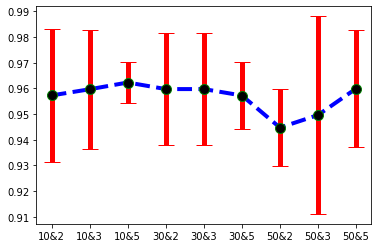

In [ ]:
x = results.index
fig, ax = plt.subplots(1, 1)
plt.errorbar(x, results['avg'], results['std'],
             ecolor='red', elinewidth=5,
             capsize=8, capthick=1,
             linewidth=4, linestyle='--', color='blue',
             marker='o', markerfacecolor='black', markeredgecolor='green', markersize=10)
ax.set_xticks(x)
ax.set_xticklabels(results['params'])

plt.show()

In [ ]:
# T&M = 30&3일 때, 성능이 안정적이므로 선택
# 또는 T&M = 10&5일 때, 성능이 가장 높으므로 선택할 수도 있음!

opt_T = 30
opt_max_depth = 3

opt_clf = RandomForestClassifier(n_estimators=opt_T,
                                 max_depth=opt_max_depth).fit(trn_X, trn_y)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
opt_prd = opt_clf.predict(tst_X)
print(confusion_matrix(tst_y, opt_prd))
print(classification_report(tst_y, opt_prd))

[[ 55  11]
 [  4 101]]
              precision    recall  f1-score   support

           0       0.93      0.83      0.88        66
           1       0.90      0.96      0.93       105

    accuracy                           0.91       171
   macro avg       0.92      0.90      0.91       171
weighted avg       0.91      0.91      0.91       171

